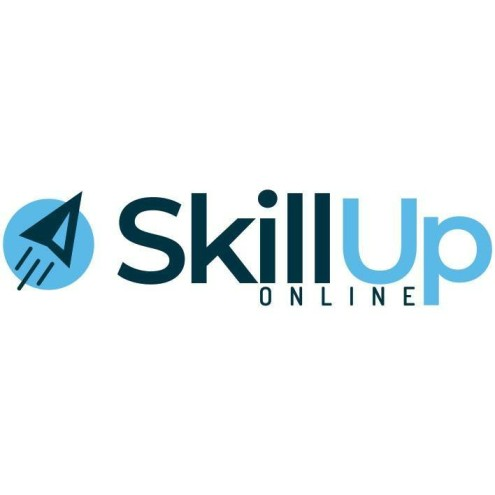

# **Detección de fraudes con tarjetas de crédito**

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importa las bibliotecas necesarias

In [1]:
# Importa la bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Importa y organiza el dataset

In [3]:
# Organizar los datos en un dataframe
df_fraud = pd.read_csv('data/creditcard.csv')

In [5]:
df_fraud.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Comienza por importar la biblioteca de pandas: import pandas as pd.
    
Utiliza la función read_csv() para cargar el archivo CSV en un dataframe de pandas. Especifica la ruta en los paréntesis, por ejemplo: pd.read_csv("ruta_al_archivo.csv").
    
Asigna al dataframe resultante al nombre de una variable, por ejemplo: data = pd.read_csv("ruta_al_archivo.csv").
    
Utiliza el método head() sobre el dataframe para mostrar las primeras 10 filas, por ejemplo: data.head(10).
    
Asegúrate de reemplazar "ruta_al_archivo.csv" con la ruta real a tu archivo y el nombre de tu archivo CSV..

```



</details>

### Limpia los datos

a. Valores perdidos

El total de valores nulos es:  0


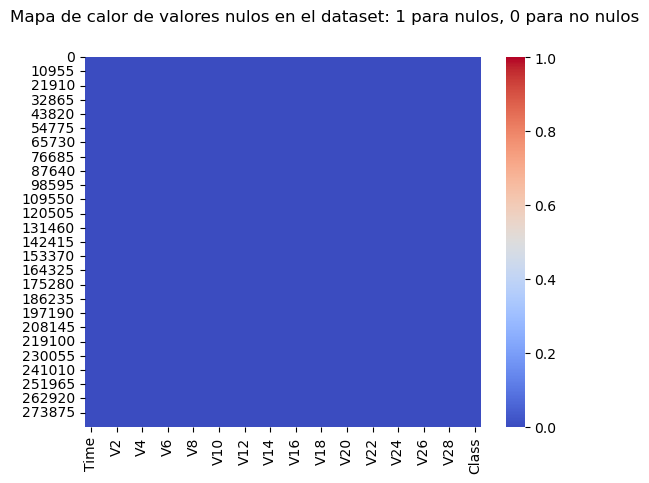

In [15]:
#Escribe tu código aquí
print('El total de valores nulos es: ',df_fraud.isnull().sum().sum())
ax1 =sns.heatmap(df_fraud.isnull(),vmin=0,vmax=1,cmap='coolwarm')
plt.suptitle('Mapa de calor de valores nulos en el dataset: 1 para nulos, 0 para no nulos')
fig1 = ax1.get_figure()
fig1.savefig("results/heatmap_null_values.png")

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```

Utiliza el nombre de la variable del dataframe seguido del método isnull() para crear un dataframe booleano donde «verdadero» indique un valor nulo y «falso» indique un valor no nulo.

Utiliza el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de valores nulos) en cada columna.

Si unes ambos pasos, el código se verá así: data.isnull().sum()


Este código asume que el nombre del datafrme de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

b. Datos duplicados

El total de valores duplicados es:  1081


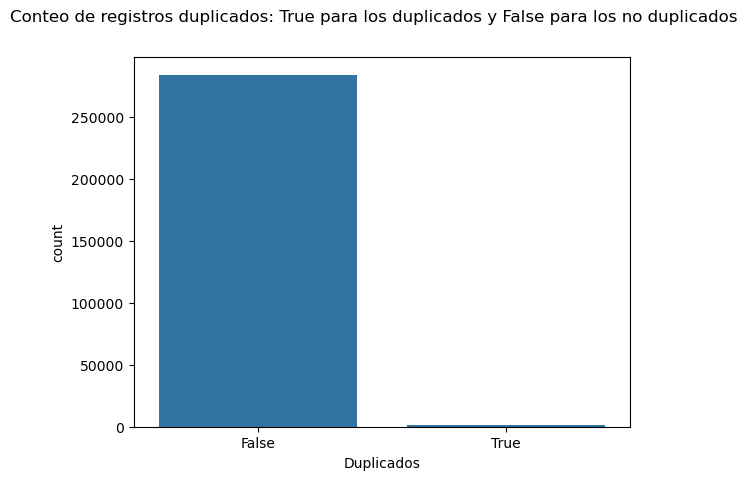

In [17]:
#Escribe tu código aquí
print('El total de valores duplicados es: ',df_fraud.duplicated().sum())
ax2 = sns.countplot(x=df_fraud.duplicated())
plt.suptitle('Conteo de registros duplicados: True para los duplicados y False para los no duplicados')
plt.xlabel('Duplicados')
fig2 = ax2.get_figure()
fig2.savefig("results/countplot_duplicates.png")
#Removiendo los duplicados
df_fraud = df_fraud.drop_duplicates()

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Usa el nombre de la variable del dataframe seguido del método duplicated() para crear un dataframe booleano donde «verdadero» indicará una fila duplicada y «falso» una fila no duplicada.

Usa el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de filas duplicadas).

Si unes ambos pasos, el código se verá así: data.duplicated().sum()

Este código asume que el nombre del dataframe de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

### Analiza los datos

Pregunta 1: ¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?



In [19]:
# Calcula el porcentaje de transacciones fraudulentas
porcentaje = round((df_fraud['Class'].value_counts()[1]/df_fraud['Class'].size)*100,3)
# Muestra el porcentaje de transacciones fraudulentas
print("El porcentaje de transacciones fraudulentas es:",porcentaje,'%')

El porcentaje de transacciones fraudulentas es: 0.167 %


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el porcentaje de transacciones fraudulentas, debes contar la cantidad de transacciones fraudulentas (aquellas donde «Class» es igual a 1) y dividirla por le número total de transacciones en el dataset. Después, multiplica el resultado por 100 para obtener el porcentaje.
</details>

Pregunta 2: ¿Cuál es el importe medio de las transacciones fraudulentas?



In [21]:
# Calcula el importe medio de las transacciones fraudulentas
fraud_mean = round(df_fraud[df_fraud['Class']==1]['Amount'].mean(),2)

# Muestra el importe medio de las transacciones fraudulentas
print("El importe medio de transacciones fraudulentas es:",fraud_mean)

El importe medio de transacciones fraudulentas es: 123.87


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el importe medio de las tansacciones fraudulentas, primero deberás filtrar el dataset para que contenga solamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, calcular la media de la columna «Amount» de los datos filtrados.
</details>

### Visualiza los datos


Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)

El número de transacciones fraudulentas es:  473  y el de no fraudulentas es:  283253


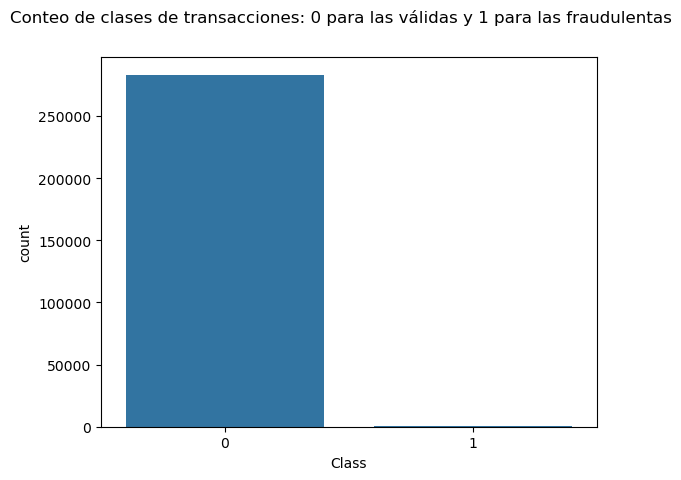

In [23]:
# Cuenta el número de transacciones fraudulentas y no fraudulentas
df_fraud['Class'].value_counts()
print('El número de transacciones fraudulentas es: ',df_fraud['Class'].value_counts()[1],' y el de no fraudulentas es: ',df_fraud['Class'].value_counts()[0])

# Muestra la distribución de las traducciones fraudulentas con respecto de las no fraudulentas
ax3 = sns.countplot(data=df_fraud,x='Class')
plt.suptitle('Conteo de clases de transacciones: 0 para las válidas y 1 para las fraudulentas')

fig3 = ax3.get_figure()
fig3.savefig("results/barplot_class.png")

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para crear un gráfico de barras que muestre la cantidad de transacciones fraudulentas y no fraudulentas, deberás contar las veces que ocurre cada clase (fraude y no fraude) según la información de la columna «Class» y después representar estos recuentos en un gráfico de barras.
</details>

Pregunta 2: ¿Cuál es la distribución de los importes de las transacciones fraudulentas? (Utiliza un histograma)


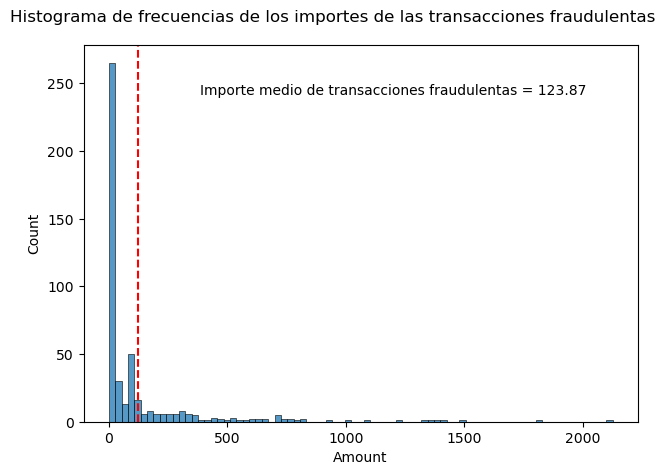

In [27]:
# Separa los datos de transacciones fraudulentas
df_only_fraud = df_fraud[df_fraud['Class']==1]['Amount']
# Muestra la distribución de los importes de las transacciones fraudulentas
ax4 = sns.histplot(df_only_fraud)
plt.suptitle('Histograma de frecuencias de los importes de las transacciones fraudulentas')
plt.axvline(x=fraud_mean, color='r', linestyle='--')
plt.text(1200, 250, 'Importe medio de transacciones fraudulentas = {:.2f}'.format(fraud_mean), ha='center', va='top')
plt.tight_layout()
fig4 = ax4.get_figure()
fig4.savefig("results/hist_amount_fraud.png")

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>
    
    Para visualizar la distribución de los importes de las transacciones fraudulentas, deberás filtrar el dataset para que contenga únicamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, usar un histograma para representar la distribución de los valores de la columna «Amount» de los datos filtrados.
</details>

## Desarrollo y evaluación de modelos

### Separa del dataset

In [31]:
# Separa los datos de entrenamiento y evaluación
X = df_fraud.drop("Class",axis=1)
y = df_fraud['Class']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)


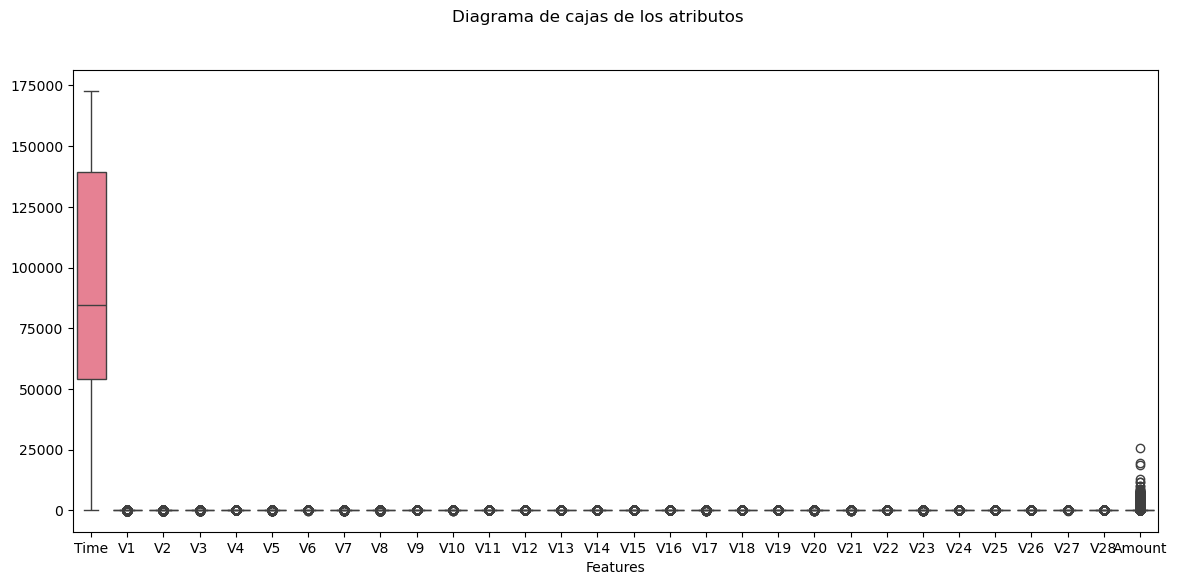

In [35]:
plt.figure(figsize=(14,6))
ax5 = sns.boxplot(X)
plt.suptitle("Diagrama de cajas de los atributos")
plt.xlabel("Features")
fig5 = ax5.get_figure()
fig5.savefig("results/boxplot_features.png")

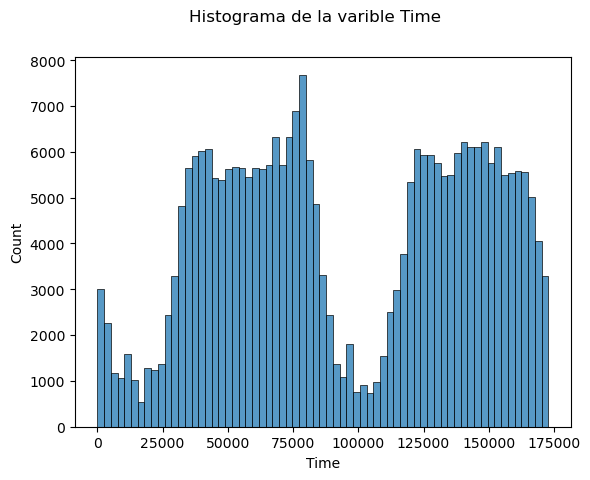

In [37]:
ax6 = sns.histplot(X['Time'])
plt.suptitle("Histograma de la varible Time")
fig6 = ax6.get_figure()
fig6.savefig("results/hist_time.png")

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Una vez que tegas este dataset, puedes utilizar la biblioteca scikit-learn para separar los datos en grupos de entrenamiento y de evaluación con la función train_test_split().

Primero, puedes crear un dataframe de pandas «X» con todas las columnas excepto la columna «Class». Puedes crear una serie de pandas «y» solamente con la clumna «Class» column.

A continuación, pueder usar la función train_test_split() para separar los datos en grupos de entrenamiento y de evaluación. Puedes pasar las variables X e Y como argumentos junto con el argumento test_size para especificar el porcentaje del dataset que se deberá asignar al grupo de evaluación (en este caso, el 20 %). También puedes utilizar el argumento random_state para determinar un valor fijo de tal manera que, cada vez que se ejecute el código, se produzca la misma división.

La función train_test_split() devuelve cuatro variables: X_train, X_test, y_train y y_test. X_train e y_train representan el grupo de entrenamiento, minetras que X_test e y_test representan el grupo de evaluación. Puedes utilizar estas variable para entrenar y evaluar tus modelos de aprendizaje automático.

Ten en cuenta que es importante dividir los datos en grupos de entrenamiento y de evaluación para evitar el sobreajuste y permitir que se evalúe el rendimiento del modelo con datos que desconoce.

```



</details>

### Crea y evalúa los modelos

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ......max_depth=1, n_estimators=50;, score=0.990 total time=  15.7s
[CV 2/3] END ......max_depth=1, n_estimators=50;, score=0.990 total time=  15.0s
[CV 3/3] END ......max_depth=1, n_estimators=50;, score=0.990 total time=  15.3s
[CV 1/3] END .....max_depth=1, n_estimators=100;, score=0.996 total time=  29.8s
[CV 2/3] END .....max_depth=1, n_estimators=100;, score=0.996 total time=  29.9s
[CV 3/3] END .....max_depth=1, n_estimators=100;, score=0.996 total time=  29.8s
[CV 1/3] END ......max_depth=2, n_estimators=50;, score=0.991 total time=  26.7s
[CV 2/3] END ......max_depth=2, n_estimators=50;, score=0.990 total time=  26.9s
[CV 3/3] END ......max_depth=2, n_estimators=50;, score=0.991 total time=  26.6s
[CV 1/3] END .....max_depth=2, n_estimators=100;, score=0.995 total time=  53.9s
[CV 2/3] END .....max_depth=2, n_estimators=100;, score=0.995 total time=  53.6s
[CV 3/3] END .....max_depth=2, n_estimators=100;,

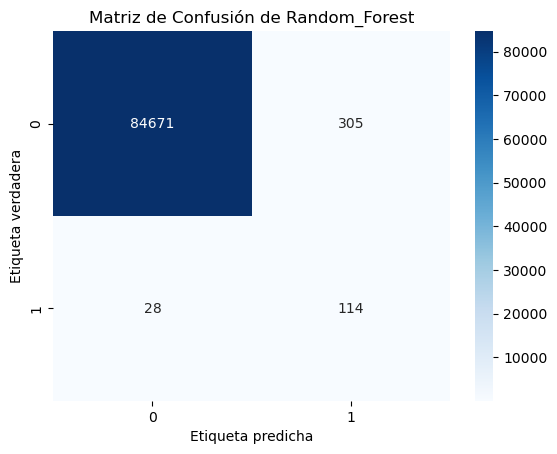

AUPRC: 0.2187564652660382
ROC AUC: 0.899613826339699


AttributeError: 'Axes' object has no attribute 'xlim'

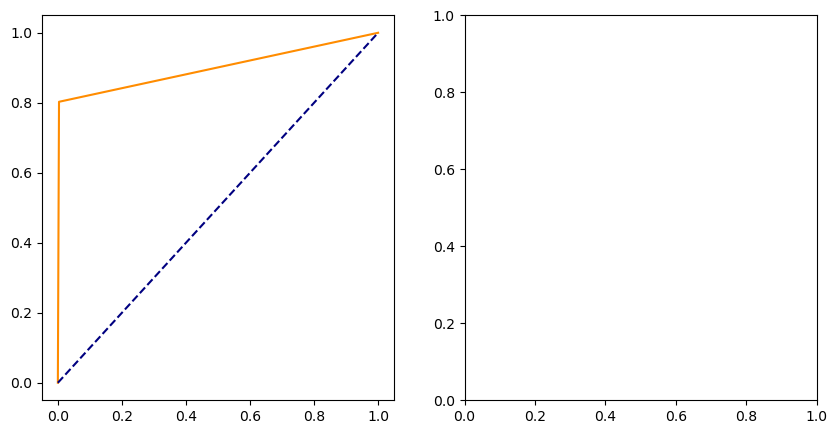

In [41]:
#Escribe tu código aquí
#Los datos presentan atributos con gran cantidad de outliers además de desviaciones de la distribución Gaussiana, 
#por tanto se probarán algoritmos robustos a estas situaciones como Random Forest y XGBoost
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, average_precision_score, roc_auc_score, roc_curve, precision_recall_curve,make_scorer, precision_score
from imblearn.over_sampling import SMOTE

# Manejar el desbalance de clases con sobremuestreo
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Definir los espacios de búsqueda de hiperparámetros
param_grid_rf = {
    'n_estimators': [50,100],
    'max_depth': [1, 2, 4]
}

param_grid_xgbc = {
    'max_depth': [1, 2, 4],
    'n_estimators': [50, 100],
    'learning_rate': [0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# Crear los modelos y realizar la optimización de hiperparámetros mediante validación cruzada 
rf = RandomForestClassifier(class_weight='balanced',random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=stratified_kfold, scoring=make_scorer(precision_score, pos_label=1),verbose=5)
grid_search_rf.fit(X_train_resampled, y_train_resampled)

xgbc = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
grid_search_xgbc = GridSearchCV(estimator=xgbc, param_grid=param_grid_xgbc, cv=stratified_kfold, scoring=make_scorer(precision_score, pos_label=1),verbose=5)
grid_search_xgbc.fit(X_train_resampled, y_train_resampled)

# Obtener los mejores modelos y hacer predicciones
best_rf = grid_search_rf.best_estimator_
print("Mejores hiperparámetros para RandomForrestClassifier: ", grid_search_rf.best_params_)
best_xgbc = grid_search_xgbc.best_estimator_
print("Mejores hiperparámetros para XGBoostClassifier: ", grid_search_rf.best_params_)

y_pred_rf = best_rf.predict(X_test)
y_pred_xgbc = best_xgbc.predict(X_test)



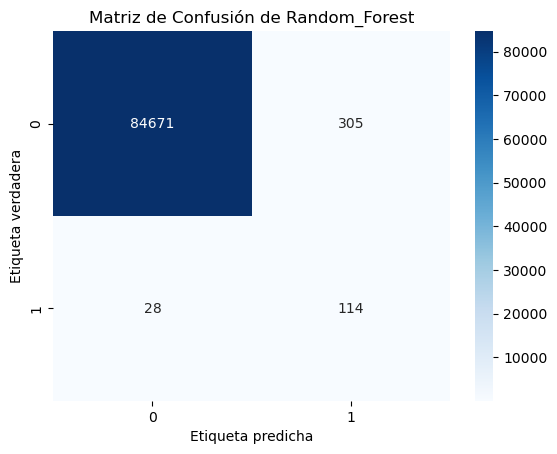

AUPRC de: Random_Forest 0.2187564652660382
ROC AUC de: Random_Forest 0.899613826339699


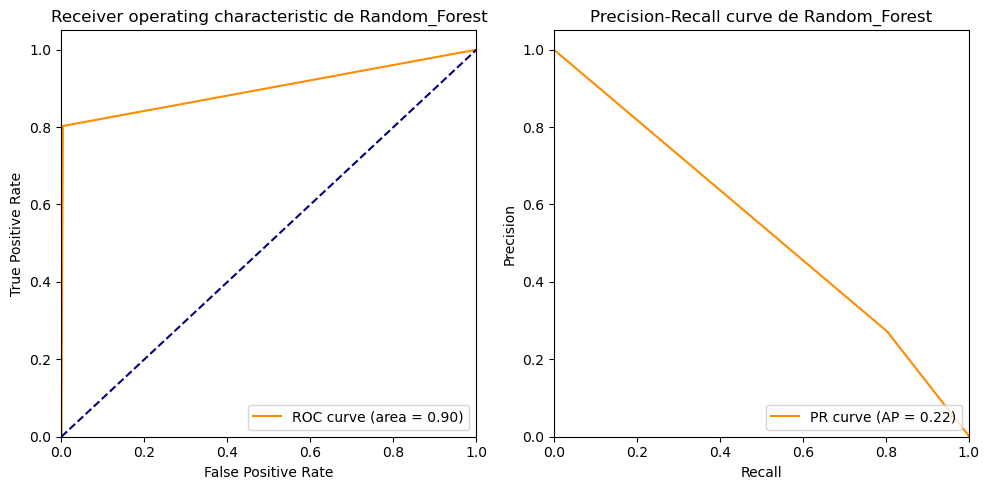

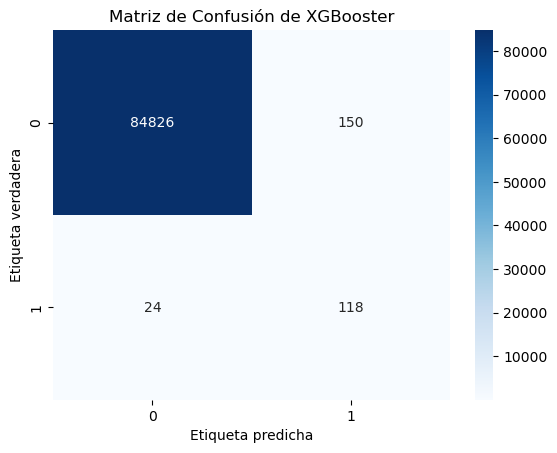

AUPRC de: XGBooster 0.36616381982631707
ROC AUC de: XGBooster 0.9146103555999904


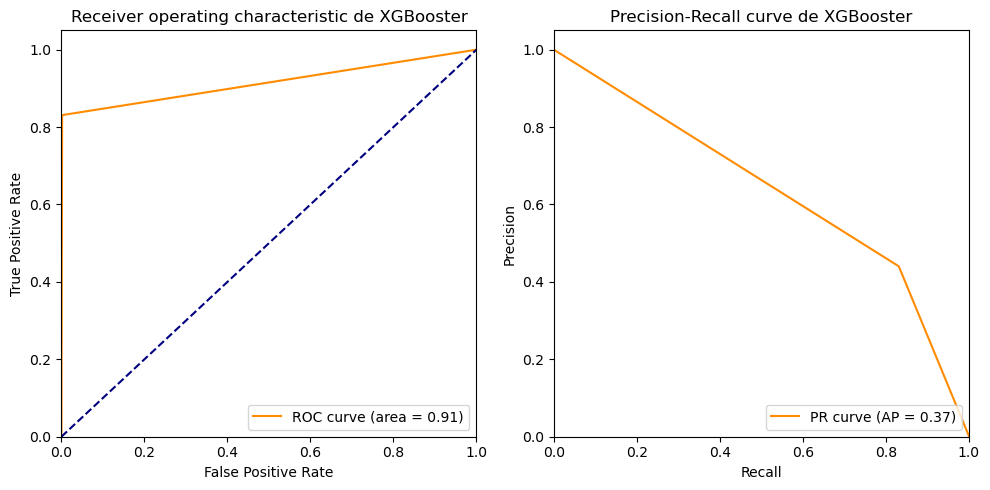

In [47]:
# Evaluar el rendimiento
def evaluate_model(y_true, y_pred,name_model):
  """
  Evalúa un modelo de clasificación binaria calculando y visualizando diversas métricas.

  Args:
    y_true: Vector de etiquetas verdaderas.
    y_pred: Vector de predicciones del modelo.

  Returns:
    None
  """

  # Matriz de confusión
  conf_matrix = confusion_matrix(y_true, y_pred)
  ax7 = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
  plt.title('Matriz de Confusión de '+name_model)
  plt.ylabel('Etiqueta verdadera')
  plt.xlabel('Etiqueta predicha')
  plt.show()
  fig7 = ax7.get_figure()
  fig7.savefig("results/heatmap_confusion_matrix_"+name_model+".png")

  # AUPRC
  average_precision = average_precision_score(y_true, y_pred)
  print("AUPRC de: "+name_model, average_precision)

  # ROC AUC
  roc_auc = roc_auc_score(y_true, y_pred)
  print("ROC AUC de: "+name_model, roc_auc)

  # Curvas ROC y PR
  fpr, tpr, _ = roc_curve(y_true, y_pred)
  precision, recall, _ = precision_recall_curve(y_true, y_pred)

  fig,ax = plt.subplots(1,2,figsize=(10, 5))

  # Curva ROC
  ax[0].plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
  ax[0].plot([0, 1], [0, 1], color='navy', linestyle='--')
  ax[0].set_xlim([0.0, 1.0])
  ax[0].set_ylim([0.0, 1.05])
  ax[0].set_xlabel('False Positive Rate')
  ax[0].set_ylabel('True Positive Rate')
  ax[0].set_title('Receiver operating characteristic de '+name_model)
  ax[0].legend(loc="lower right")

  # Curva PR
  ax[1].plot(recall, precision, color='darkorange', label='PR curve (AP = %0.2f)' % average_precision)
  ax[1].set_xlim([0.0, 1.0])
  ax[1].set_ylim([0.0, 1.05])
  ax[1].set_xlabel('Recall')
  ax[1].set_ylabel('Precision')
  ax[1].set_title('Precision-Recall curve de '+name_model)
  ax[1].legend(loc="lower right")

  plt.tight_layout()  

  plt.show()
  fig.savefig("results/Results_"+name_model+".png")

evaluate_model(y_test, y_pred_rf,name_model="Random_Forest")
evaluate_model(y_test, y_pred_xgbc,name_model="XGBooster")

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Debes haber importado las bibliotecas y clases necesarias, tales como la clase RandomForestClassifier de scikit-learn y las funciones classification_report() y accuracy_score() functions del módulo sklearn.metrics.

Una vez hayas hecho esto, podrás crear una instancia de la clase RandomForestClassifier configurando los hiperparámetros max_depth y random_state en 150 y 42, respectivamente. Puedes utilizar el método .fit() para entrenar el modelo con los datos de entrenamiento.

A continuación, puedes utilizar el modelo entrenado para hacer predicciones sobre los datos de evaluación con el método .predict(). Puedes almacenar estas predicciones en una variable llamada y_pred.

Después, puedes utilizar la función classification_report() para mostrar en la pantalla un resumen del rendimiento del modelo con los datos de entrenamiento. Esto incluirá métricos tales como la precisión (precission), la exhaustividad (recall) y la puntuación F1 (f1-score) para cada una de las clases (en este caso, si una transacción es fraudulenta o normal). También puedes utilizar la función accuracy_score() para calcular la exactitud general del modelo con los datos de evaluación.

Finalmente, podrás mostrar la exactitud el modelo en forma de porcentaje; utiliza el operador *100 para multiplicar la puntuación de exactitud por 100.

```



</details>

# Conclusiones
El Modelo XGBoostClassifier con sus mejores parámetros producto del entrenamiento con validación cruzada es claramente mejor que el Modelo Random Forrest Classifier también entrenado y evaluado. Aunque ambos modelos tienen un buen desempeño en términos de ROC AUC, lo más importante en este caso es el valor de AUPRC, ya que en conjuntos de datos desbalanceados, esta métrica es más representativa del rendimiento sobre la clase minoritaria.

Por lo tanto, el Modelo XGBoostClassifier es preferible porque maneja mejor las predicciones de la clase positiva (minoritaria) sin desmejorar el rendimiento general en la separación de las clases, como lo indica su mejor AUPRC y ligeramente mejor ROC AUC.